In [58]:
import pandas as pd
import os
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

class StockData:
    def __init__(self, folder_path : str):
        
        data_frames = []
        for filename in os.listdir(folder_path):
            if filename.endswith('.csv'):
                ticker = filename[:-4]
                file_path = os.path.join(folder_path, filename)
                stock_data = pd.read_csv(file_path)
                stock_data['Ticker'] = ticker
                data_frames.append(stock_data)
        
        self.data = pd.concat(data_frames, ignore_index=True)
        self.data['Date'] =  pd.to_datetime(self.data['Date'])

    def infos(self) -> None :
        "Display Available Tickers"
        print(f"Current Tickers in dataframe :  {self.data['Ticker'].unique()}")

    def get_historical_data(self, ticker, from_date: str = None, to_date: str = None) -> pd.DataFrame : 
        "return historical data from a specified stock given ticker and optional datetimes"

        filtered_data = self.data[self.data['Ticker'] == ticker]

        if from_date:
            from_date = datetime.strptime(from_date, '%Y-%m-%d')
            filtered_data = filtered_data[filtered_data['Date'] >= from_date]

        if to_date:
            to_date = datetime.strptime(to_date, '%Y-%m-%d')
            filtered_data = filtered_data[filtered_data['Date'] <= to_date]
        return filtered_data
    
    def plot_stocks(self, tickers : str , normalize : bool = False)  -> None :
        sns.set_style('whitegrid') 

        common_start_date = None
        for ticker in tickers:
            stock_data = self.get_historical_data(ticker)
            start_date = stock_data['Date'].iloc[0]
            if common_start_date is None or start_date > common_start_date:
                common_start_date = start_date
                print(common_start_date)

        plt.figure(figsize=(10, 6)) 
        for ticker in tickers:
            stock_data = self.get_historical_data(ticker)
            stock_data = stock_data[stock_data['Date'] >= common_start_date]
            if normalize:
                stock_data['Close'] = stock_data['Close'] / stock_data['Close'].iloc[0]
            sns.lineplot(x='Date', y='Close', data=stock_data, label=ticker)
        plt.title('Historical Stock Prices')
        plt.xlabel('Date')
        plt.ylabel('Close Price')
        plt.legend()
        plt.show()




Current Tickers in dataframe :  ['AAPL' 'AMZN' 'BA' 'CVX' 'DIS' 'DOW' 'GS' 'JNJ' 'JPM' 'KO' 'MCD' 'MMM'
 'MRK' 'MSFT' 'NKE' 'PFE' 'PG' 'SPG' 'T' 'WFC' 'XOM' '^SPX']


In [ ]:
# Utilisation de la classe
folder_path = r"data\raw"
stocks = StockData(folder_path)
stocks.infos()

            Date        Open        High         Low       Close   Adj Close  \
0     1980-12-12    0.128348    0.128906    0.128348    0.128348    0.099450   
1     1980-12-15    0.122210    0.122210    0.121652    0.121652    0.094261   
2     1980-12-16    0.113281    0.113281    0.112723    0.112723    0.087343   
3     1980-12-17    0.115513    0.116071    0.115513    0.115513    0.089504   
4     1980-12-18    0.118862    0.119420    0.118862    0.118862    0.092099   
...          ...         ...         ...         ...         ...         ...   
10755 2023-08-11  177.320007  178.619995  176.550003  177.789993  177.789993   
10756 2023-08-14  177.970001  179.690002  177.309998  179.460007  179.460007   
10757 2023-08-15  178.880005  179.479996  177.050003  177.449997  177.449997   
10758 2023-08-16  177.130005  178.539993  176.500000  176.570007  176.570007   
10759 2023-08-17  177.139999  177.509995  173.479996  174.000000  174.000000   

          Volume Ticker  
0      469033

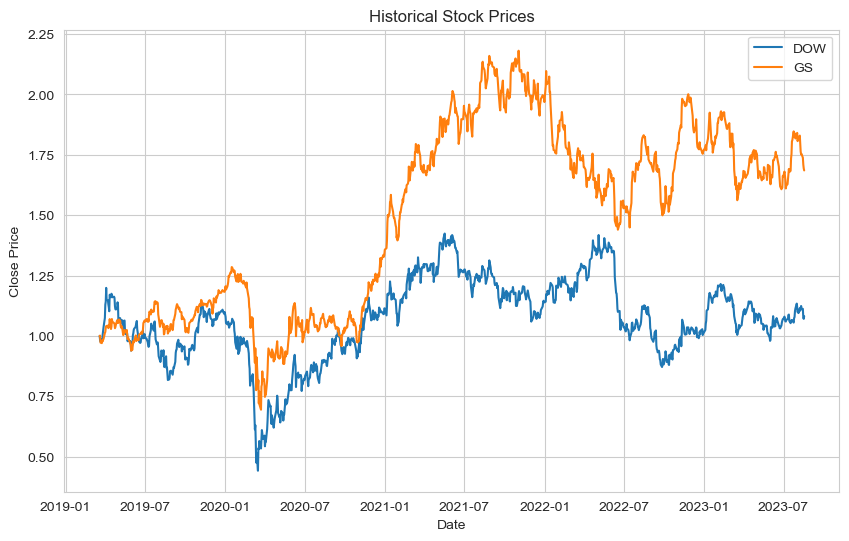

In [59]:
# Exemple pour récupérer les données historiques pour Apple
apple_data = stocks.get_historical_data('AAPL')
print(apple_data) 

stocks.plot_stocks(["DOW","GS"],normalize=True)